# Exercise 1

## Imports

In [2]:
from kohonen import SelfOrganizingMap
from utils import load_europe_data
import numpy as np
from matplotlib import pyplot as plt
from oja import OjaNetwork

## Loading the Data

In [4]:
X, countries = load_europe_data("../data/europe.csv")
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
ratio = np.sqrt(pca.explained_variance_[0] / pca.explained_variance_[1])
print(f"First component variance: {pca.explained_variance_[0]:.4f}")
print(f"Second component variance: {pca.explained_variance_[1]:.4f}")
print(f"Ratio (PC1 / PC2): {pca.explained_variance_[0] / pca.explained_variance_[1]:.2f}")
print(f"PCA σ1/σ2 ratio ≈ {ratio:.2f}")

First component variance: 3.3467
Second component variance: 1.2311
Ratio (PC1 / PC2): 2.72
PCA σ1/σ2 ratio ≈ 1.65


## Training

### Self Organising Map

#### Configuration

In [13]:
m, n = 6, 5
learning_rate = 0.5
sigma = 1.5
epochs = 100

#### Training

In [14]:
som = SelfOrganizingMap(
    m=m,
    n=n,
    dim=X.shape[1],
    learning_rate=learning_rate,
    sigma=sigma,
    epochs=epochs,
)
print(f"Training SOM on {X.shape[0]} samples…")
som.train(X)
print("Done.")

Training SOM on 28 samples…


Done.


## Visualisation

### SOM Clusters

4 [-0.39569925  0.65122102]
22 [0.52365896 0.07018423]
2 [-0.99733161  0.35377115]
6 [ 0.93687457 -0.95140669]
1 [0.27241655 0.69799626]
5 [-0.9884501  -0.34570327]
7 [ 0.42387833 -0.52764312]
13 [0.63036699 0.6428575 ]
24 [-0.35288136  0.25070219]
8 [0.13985292 0.9816585 ]
18 [-0.05564162 -0.09179501]
12 [-0.41770832  0.28032851]
16 [-0.60482905  0.75718558]


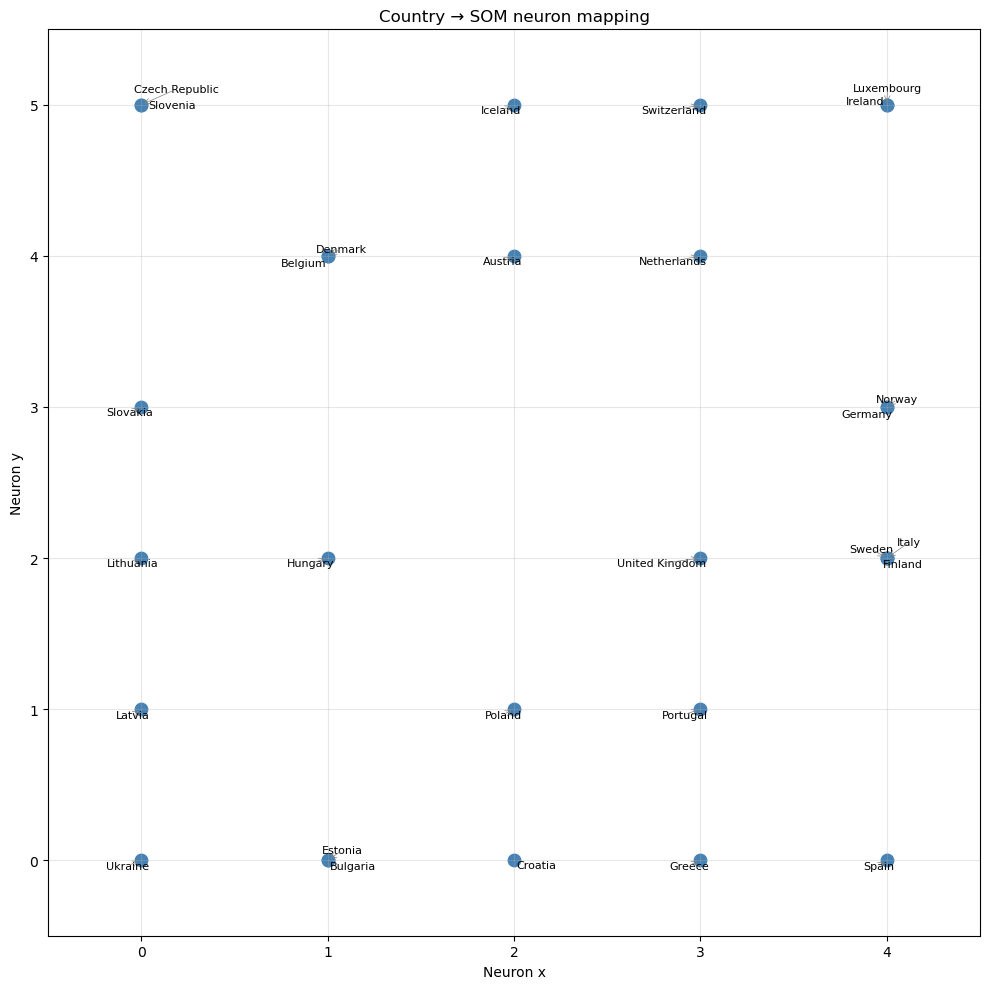

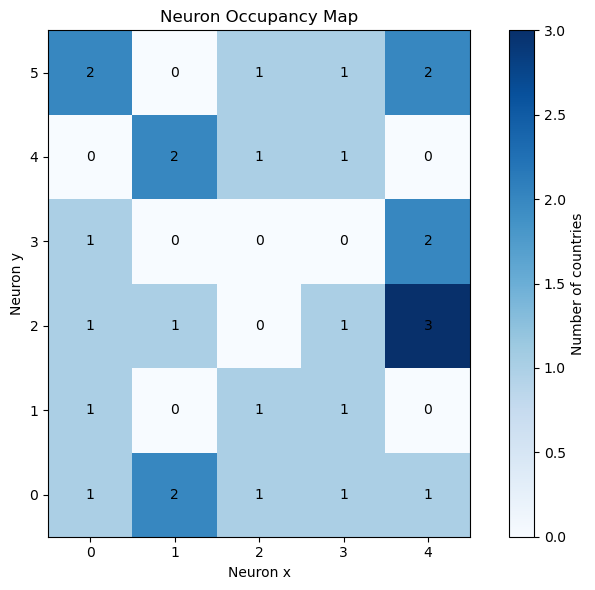

In [ ]:
from adjustText import adjust_text
bmus = som.map_data(X)
coords = np.array([[i,j] for i in range(m) for j in range(n)])
mapped = coords[bmus]
x_coords = mapped[:,1]
y_coords = mapped[:,0]

plt.figure(figsize=(10,10), dpi=100)
plt.scatter(x_coords, y_coords, s=80, marker='o', color='steelblue')

texts = []
for x, y, country in zip(x_coords, y_coords, countries):
    texts.append(
        plt.text(x, y, country, fontsize=8, ha='center', va='center')
    )

adjust_text(
    texts,
    only_move={'points':'y', 'texts':'xy'},
    arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
    expand_text=(1.1, 1.2),
    expand_points=(1.2, 1.2)
)

plt.xlim(-0.5, n-0.5)
plt.ylim(m-0.5, -0.5)
plt.gca().invert_yaxis()
plt.xticks(range(n))
plt.yticks(range(m))
plt.grid(alpha=0.3)
plt.title("Country → SOM neuron mapping")
plt.xlabel("Neuron x")
plt.ylabel("Neuron y")
plt.tight_layout()
plt.show()

occupancy = np.zeros((m, n), dtype=int)
for bmu in bmus:
    i, j = coords[bmu]
    occupancy[i, j] += 1

plt.figure(figsize=(8, 6))
plt.imshow(occupancy, cmap='Blues', origin='lower')
plt.colorbar(label="Number of countries")
plt.xticks(range(n))
plt.yticks(range(m))
plt.title("Neuron Occupancy Map")
plt.xlabel("Neuron x")
plt.ylabel("Neuron y")

for i in range(m):
    for j in range(n):
        plt.text(j, i, str(occupancy[i, j]), ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

### U-Matrix

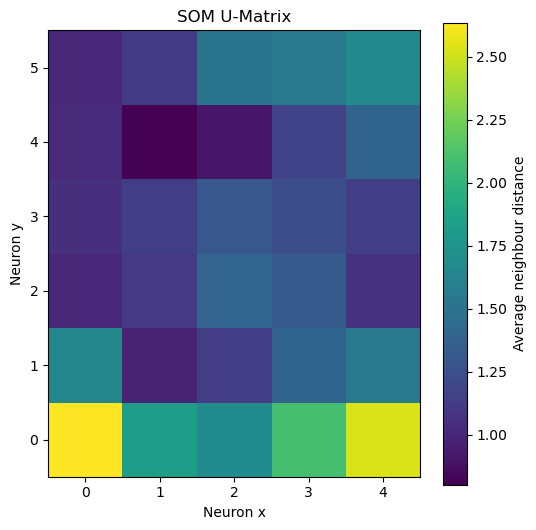

In [16]:
u = som.umatrix()            # shape (m, n)
plt.figure(figsize=(6,6))
plt.imshow(u, cmap="viridis", origin="lower")
plt.colorbar(label="Average neighbour distance")
plt.title("SOM U-Matrix")
plt.xlabel("Neuron x")
plt.ylabel("Neuron y")
plt.show()

## Comparison

### Oja Primary Component

In [17]:
net = OjaNetwork(dim=7, learning_rate=0.01, epochs=100)
net.train(X)
comp = net.get_principal_component()
comp

array([-0.19834228,  0.48009099, -0.46966769,  0.49084559, -0.12824418,
        0.44764647, -0.22764427])

### PCA Primary Component

In [20]:
pca = PCA(n_components=1)
pca_comp = pca.fit(X).components_[0]
print(pca_comp)
cosine_similarity = np.dot(pca_comp, comp)
print('Cosine similarity: ', cosine_similarity)

[-0.1248739   0.50050586 -0.40651815  0.48287333 -0.18811162  0.47570355
 -0.27165582]
Cosine similarity:  0.9919129418458622


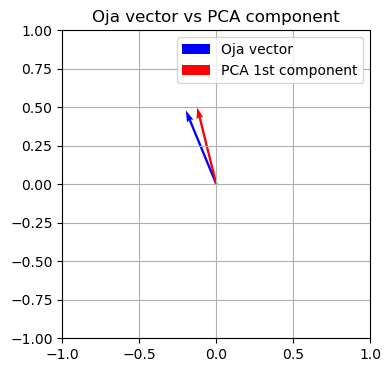

In [21]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1)

# Plot Oja vector
ax.quiver(0, 0, comp[0], comp[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Oja vector')

# Plot PCA vector
ax.quiver(0, 0, pca_comp[0], pca_comp[1], angles='xy', scale_units='xy', scale=1, color='red', label='PCA 1st component')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')
ax.legend()
plt.grid()
plt.title("Oja vector vs PCA component")
plt.show()